In [1]:
using CSV
using Statistics
using DataFrames
using PyPlot
result=DataFrame(Dimension=Int[],points=Int[],sampling_method=String[],relative_error_average=Float64[]);

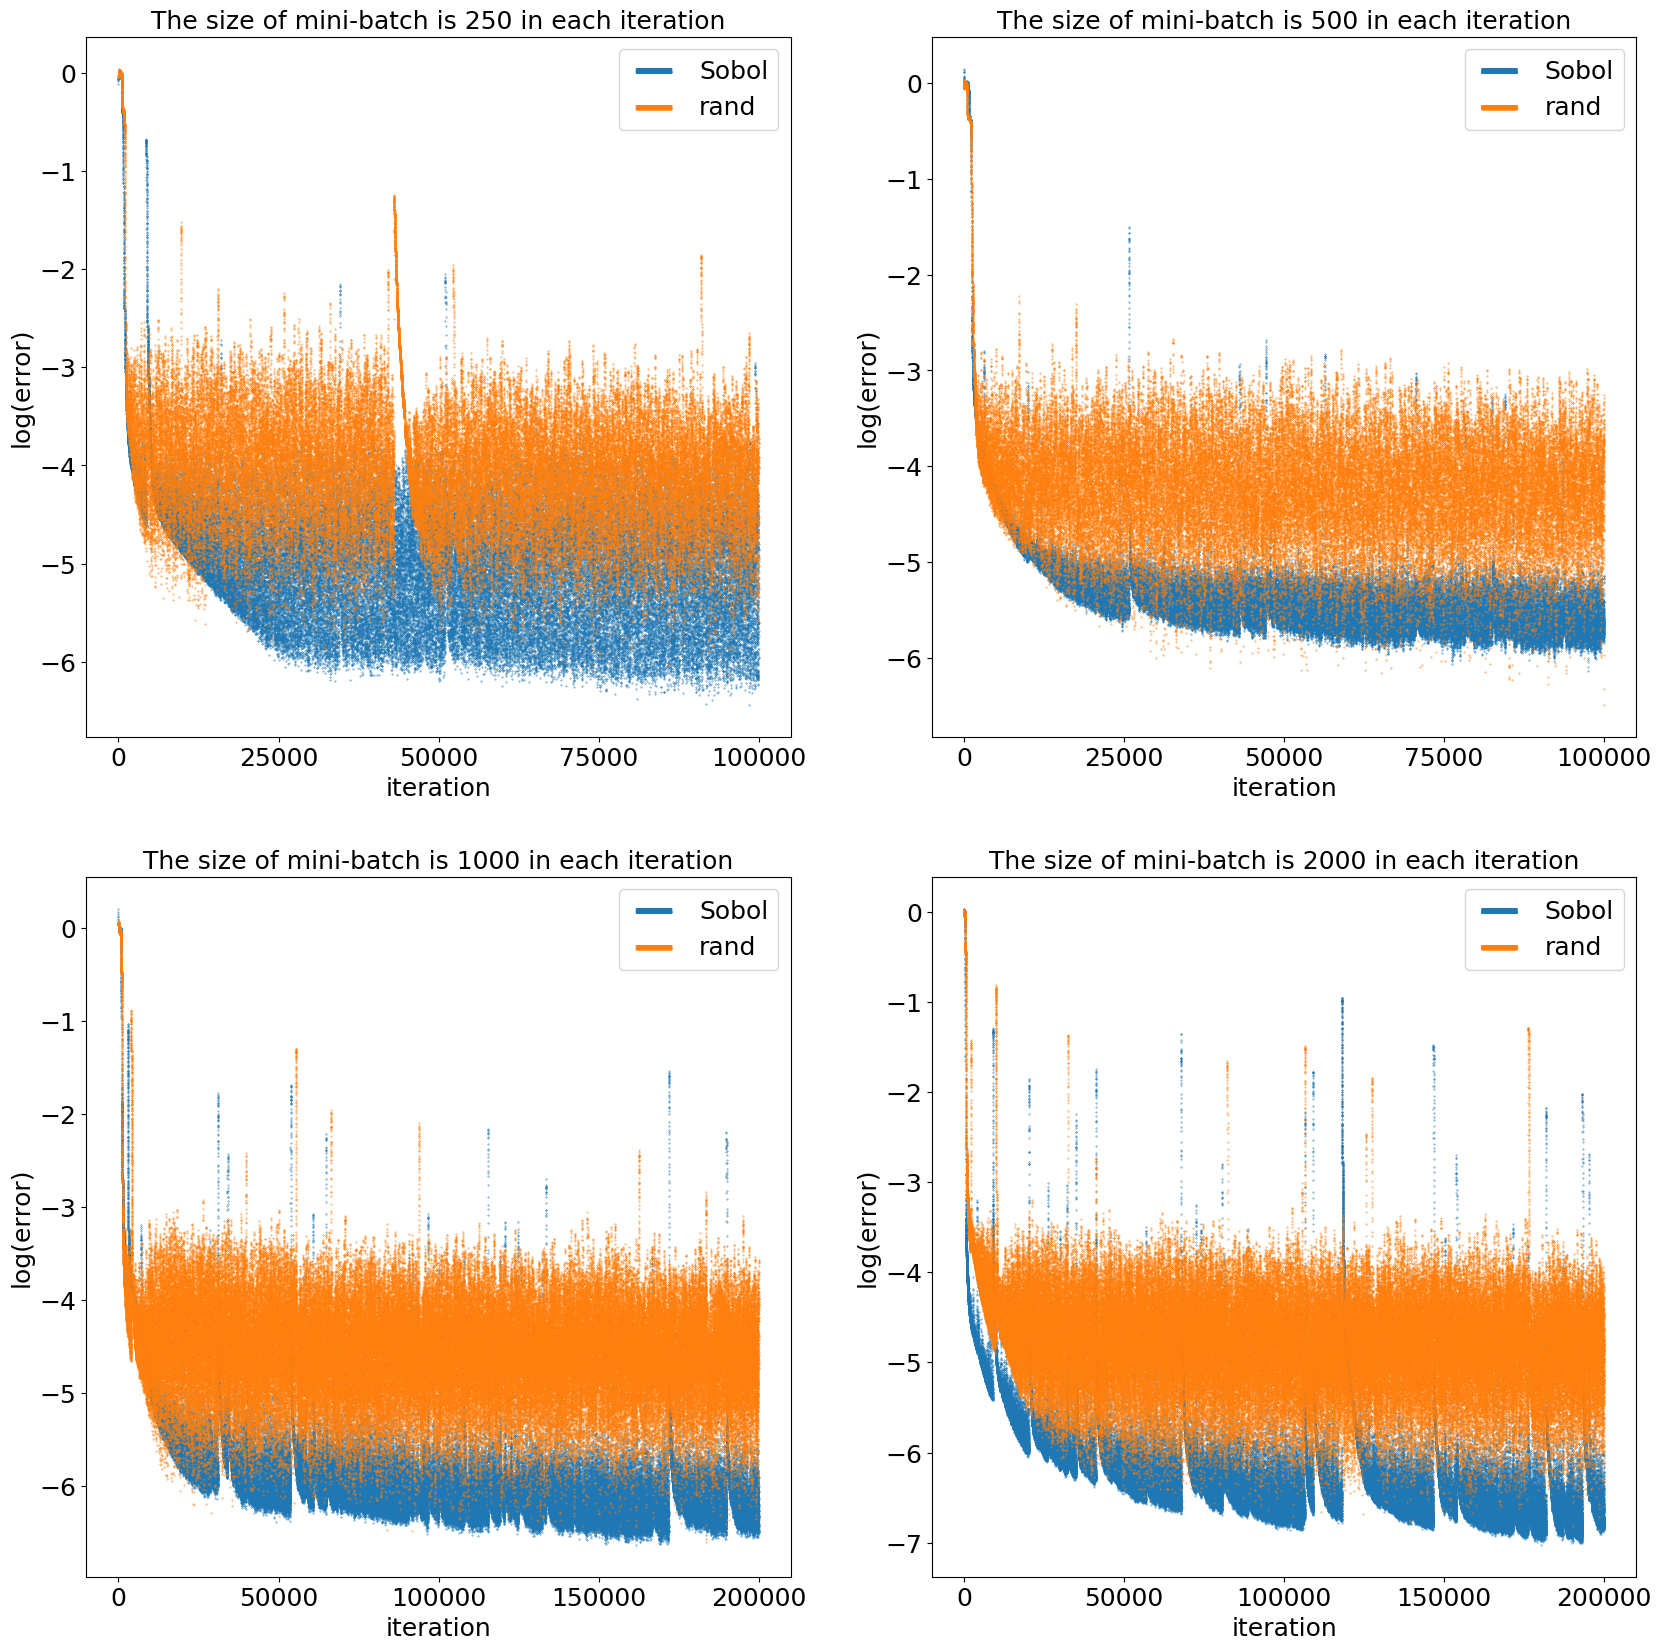

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [2]:
fontsize1=18
font1 = Dict("family"=>"sans-serif",
    "color"=>"k",
    "weight"=>"normal",
    "size"=>fontsize1)
suptitle("compare the accuracy of QMC and MC method in fixed number of point in 2 Dimensional problems",fontsize=fontsize1)
fig=figure("2DcompareQMCandMCwithpenaltyterm",figsize=(20,20))

for i=1:4
    N=[250 500 1000 2000]
    errdf1=CSV.read("$(N[i])Sobol2Dexm2.csv");
    errdf2=CSV.read("$(N[i])rand2Dexm2.csv");
    subplot(2,2,i)
    scatter(errdf1.time,log.(errdf1.absolute_error),0.1,label="Sobol")
    scatter(errdf2.time,log.(errdf2.absolute_error),0.1,label="rand")
    push!(result, (2,N[i],"Sobol", mean(errdf1.absolute_error[end-1000:end])))
    push!(result, (2,N[i],"Rand", mean(errdf2.absolute_error[end-1000:end])));
    legend(loc="upper right",fancybox="true",scatterpoints=1000)
    ax=gca()
    xlabel("iteration",fontdict=font1)
    ylabel("log(error)",fontdict=font1)
    setp(ax.get_xticklabels(),fontsize=fontsize1)
    setp(ax.get_yticklabels(),fontsize=fontsize1)
    ax.locator_params(axis ="x", nbins=5)
    legend(loc="upper right",fancybox="true",fontsize=fontsize1,scatterpoints=1000)
    PyPlot.title("The size of mini-batch is $(N[i]) in each iteration",fontdict=font1)
end
savefig("C:\\Users\\lyu\\Documents\\deep-ritz\\LaTeX_DL_468198_240419\\figure\\2DcompareNBCwithpenaltyterm.eps")

In [3]:
for i=1:4
    N=[500 1000 2000 4000]
    errdf1=CSV.read("$(N[i])Sobol4Dexm2.csv");
    errdf2=CSV.read("$(N[i])rand4Dexm2.csv");
    push!(result, (4,N[i],"Sobol", mean(errdf1.absolute_error[end-1000:end])/sqrt(2)))
    push!(result, (4,N[i],"Rand", mean(errdf2.absolute_error[end-1000:end])/sqrt(2)));
end

In [4]:
for i=1:4
    N=[500 1000 2000 10000]
    errdf1=CSV.read("$(N[i])Sobol8Dexm2.csv");
    errdf2=CSV.read("$(N[i])rand8Dexm2.csv");
    push!(result, (8,N[i],"Sobol", mean(errdf1.absolute_error[end-1000:end])/2))
    push!(result, (8,N[i],"Rand", mean(errdf2.absolute_error[end-1000:end])/2));
end

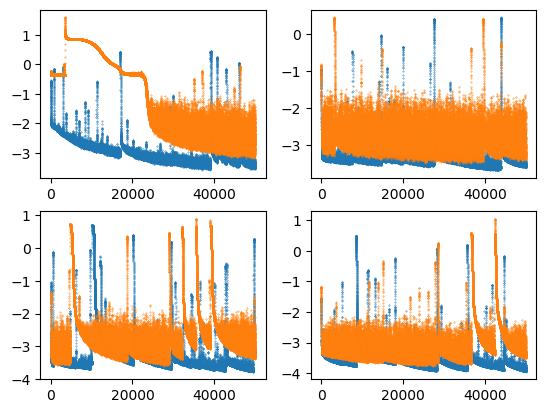

In [5]:
for i=1:4
    subplot(2,2,i)
    N=[1000 2000 5000 10000]
    errdf1=CSV.read("$(N[i])Sobol16Dexm2.csv");
    errdf2=CSV.read("$(N[i])rand16Dexm2.csv");
    push!(result, (16,N[i],"Sobol", mean(errdf1.absolute_error[end-2000:end-1000])/2sqrt(2)))
    push!(result, (16,N[i],"Rand", mean(errdf2.absolute_error[end-2000:end-1000])/2sqrt(2)));
    scatter(errdf1.time,log.(errdf1.absolute_error),0.1,label="Sobol")
    scatter(errdf2.time,log.(errdf2.absolute_error),0.1,label="rand")
end

In [6]:
CSV.write("compareresult.csv",result)

"compareresult.csv"

In [7]:
result

,Dimension,points,sampling_method,relative_error_average
,Int64,Int64,String,Float64
1,2,250,Sobol,0.00807932
2,2,250,Rand,0.0161507
3,2,500,Sobol,0.00417634
4,2,500,Rand,0.0150275
5,2,1000,Sobol,0.00208564
6,2,1000,Rand,0.0101014
7,2,2000,Sobol,0.00146977
8,2,2000,Rand,0.00832735
9,4,500,Sobol,0.00443351
